<a href="https://colab.research.google.com/github/the-cryptozoologist/data-science/blob/main/entropy/entropy-of-written-english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entropy of Written English

Entropy in information theory: unpredictable things convey more information.



In [1]:
from google.colab import drive

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

import requests
import re

In [3]:
link = requests.get("https://www.gutenberg.org/files/35/35-0.txt")

txt_raw = link.text

txt_raw[:1000]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: The Time Machine\r\n\r\nAuthor: H. G. Wells\r\n\r\nRelease Date: July, 1992 [eBook #35]\r\n[Most recently updated: October 22, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***\r\n\r\n\r\n\r\n\r\nThe Time Machine\r\n\r\nAn Invention\r\n\r\nby H. G. Wells\r\n\r\n\r\nCONTENTS\r\n\r\n I Introduction\r\n II The Machine\r\n III The Time Traveller Returns\r\n IV 

In [4]:
# Patterns to be replaced

replace = ["\r\n\r\nâ\x80\x9c", # paragraph
           "â\x80\x9c",         # open quote
           "â\x80\x9d",         # close quote
           "\r\n",              # new line
           "â\x80\x94",         # hyphen
           "â\x80\x99",         # single apostrophe
           "â\x80\x98",         # single quote
           "_",                 # underscore, stressing
           "\'"                 # ??
          ]

In [58]:
for r in replace:
  regexp = re.compile(r"%s"%replace)

txt = regexp.sub(" ", txt_raw)


In [59]:
txt[:1000]

'ï»¿The Project Gutenberg eBook of The Time Machine  by H. G. Wells    This eBook is for the use of anyone anywhere in the United States and  most other parts of the world at no cost and with almost no restrictions  whatsoever. You may copy it  give it away or re-use it under the terms  of the Project Gutenberg License included with this eBook or online at  www.gutenberg.org. If you are not located in the United States  you  will have to check the laws of the country where you are located before  using this eBook.    Title: The Time Machine    Author: H. G. Wells    Release Date: July  1992 [eBook #35]  [Most recently updated: October 22  2020]    Language: English    Character set encoding: UTF-8      *** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***          The Time Machine    An Invention    by H. G. Wells      CONTENTS     I Introduction   II The Machine   III The Time Traveller Returns   IV Time Travelling   V In the Golden Age   VI The Sunset of Mankind   VII A Sudde

# Word length distribution

In [60]:
words = txt.lower().split()

In [61]:
words[:10]

['ï»¿the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'time',
 'machine',
 'by',
 'h.']

In [74]:
def remove_punc(string):
  punc = "'!()-,[]#{};:.ï»¿<>?@^*0123456789$\""
  for s in string:
    if s in punc:
      string = string.replace(s, "")
  return string

clean_words = [remove_punc(i) for i in words]

clean_words[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'time',
 'machine',
 'by',
 'h']

In [75]:
print(len(clean_words))

35816


In [76]:
df = pd.DataFrame (clean_words, columns = ["Word"])
df

,Word
0,the
1,project
2,gutenberg
3,ebook
4,of
...,...
35811,to
35812,hear
35813,about
35814,new


In [77]:
df["Length"]  = df["Word"].str.len()
df

,Word,Length
0,the,3
1,project,7
2,gutenberg,9
3,ebook,5
4,of,2
...,...,...
35811,to,2
35812,hear,4
35813,about,5
35814,new,3


In [78]:
len_count = df["Length"].value_counts().drop([0,17,18,19,22,23,25])
len_count.sort_index()

1     2320
2     5853
3     7934
4     6169
5     3835
6     2779
7     2494
8     1565
9     1203
10     840
11     378
12     240
13      86
14      37
15      15
16       7
Name: Length, dtype: int64

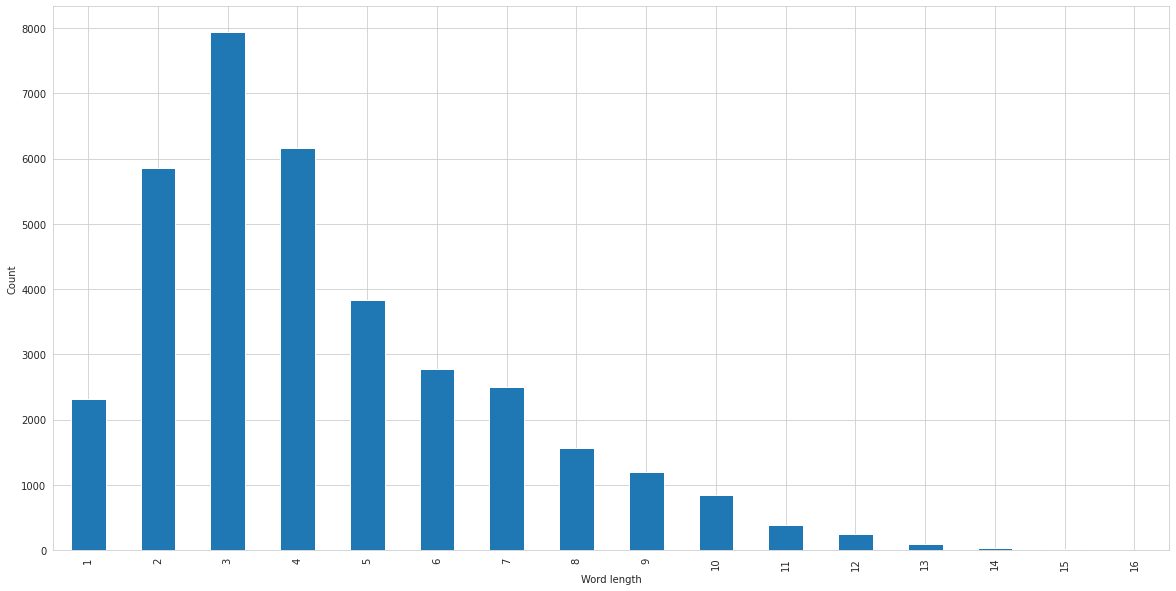

In [79]:
# Distribution of word lengths

plt.figure(figsize=(20,10))
len_count.sort_index().plot(kind="bar")
plt.xlabel("Word length")
plt.ylabel("Count")
plt.show()

In [80]:
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
letter_counter = []

for i in range(0,26):
    letter_counter.append(txt.count(alphabet[i]))

In [81]:
df2 = pd.DataFrame (alphabet, columns = ["Letter"])
df2["Frequency"] = letter_counter

df2

,Letter,Frequency
0,a,12432
1,b,2016
2,c,3978
3,d,6790
4,e,19592
5,f,3601
6,g,3366
7,h,8715
8,i,9732
9,j,171


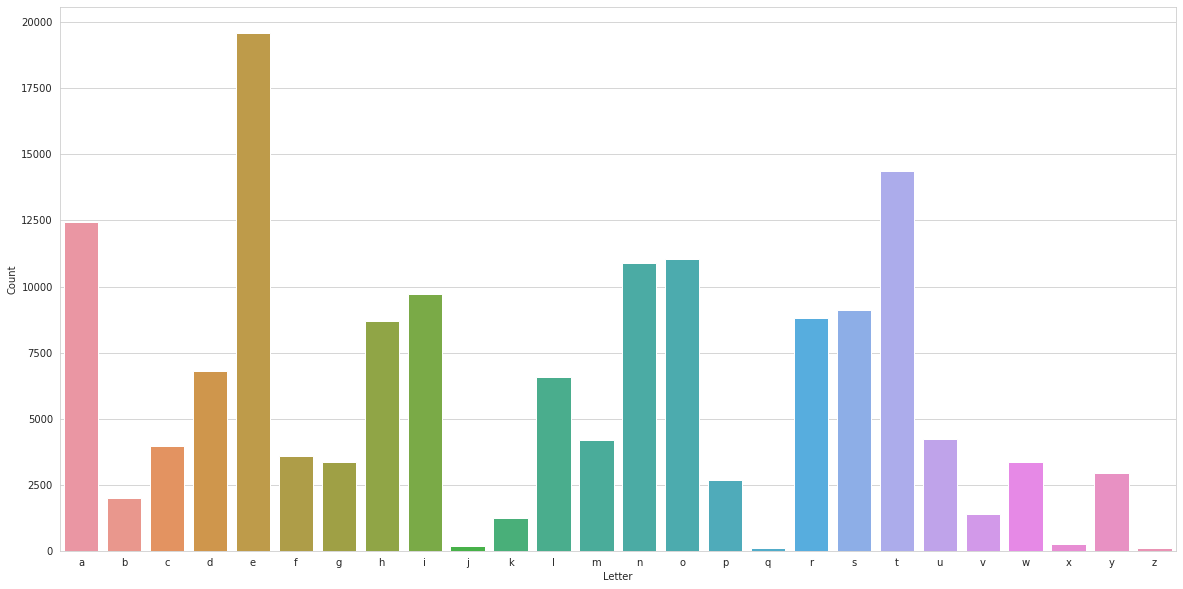

In [82]:
# Distribution of letters

plt.figure(figsize=(20,10))
sns.barplot(x="Letter", y="Frequency", data=df2)
plt.xlabel("Letter")
plt.ylabel("Count")
plt.show()

In [83]:
letter_prob = []
for i in range(0,len(alphabet)):
  letter_prob.append(letter_counter[i] / sum(letter_counter))

In [84]:
df2["Probability"] = letter_prob
df2

,Letter,Frequency,Probability
0,a,12432,0.081943
1,b,2016,0.013288
2,c,3978,0.026220
3,d,6790,0.044755
4,e,19592,0.129137
5,f,3601,0.023735
6,g,3366,0.022186
7,h,8715,0.057443
8,i,9732,0.064147
9,j,171,0.001127


In [85]:
entropy = -sum(letter_prob * np.log2(letter_prob))
entropy

4.169896314045743

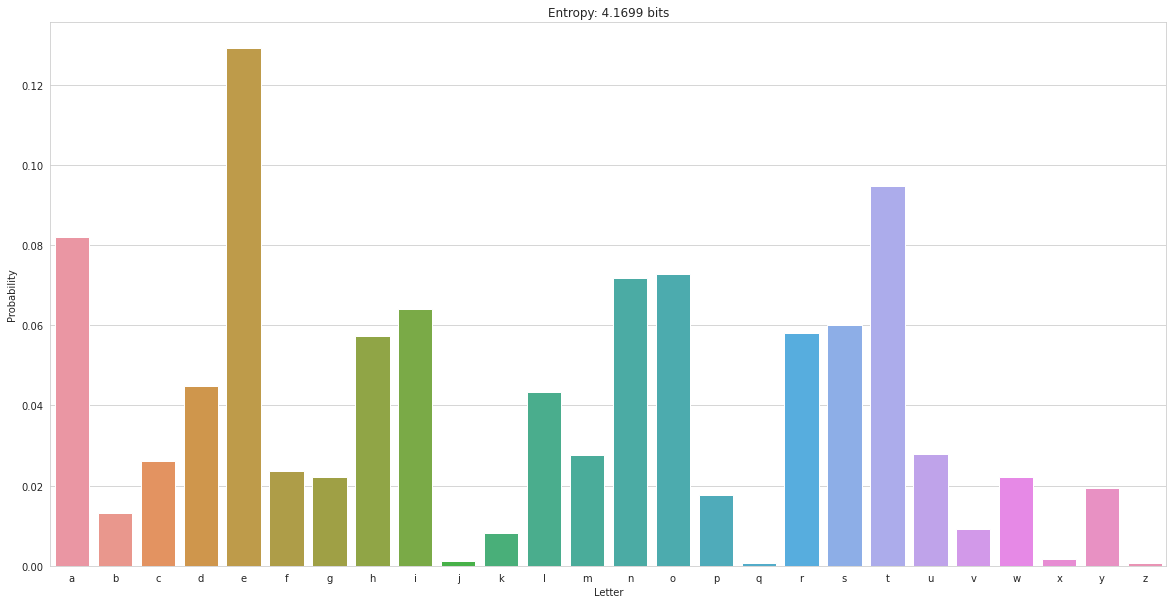

In [86]:
# Letter probability

plt.figure(figsize=(20,10))
sns.barplot(x="Letter", y="Probability", data=df2)
plt.xlabel("Letter")
plt.ylabel("Probability")
plt.title(f"Entropy: {entropy.round(4)} bits")
plt.show()

# Conditional entropy

In [87]:
probmat = np.zeros((len(alphabet),len(alphabet)))

clean_txt = " ".join(clean_words)

clean_txt[:1000]

'the project gutenberg ebook of the time machine by h g wells this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or reuse it under the terms of the project gutenberg license included with this ebook or online at wwwgutenbergorg if you are not located in the united states you will have to check the laws of the country where you are located before using this ebook title the time machine author h g wells release date july  ebook  most recently updated october   language english character set encoding utf  start of the project gutenberg ebook the time machine  the time machine an invention by h g wells contents i introduction ii the machine iii the time traveller returns iv time travelling v in the golden age vi the sunset of mankind vii a sudden shock viii explanation ix the morlocks x when night came xi the palace of green porcelain xii in the darkness xiii 

In [91]:
for i in range(len(clean_txt)-1):
  current_letter = clean_txt[i]
  next_letter = clean_txt[i+1]
  if current_letter in alphabet and next_letter in alphabet:
    probmat[alphabet.index(current_letter),alphabet.index(next_letter)] += 1
  else:
    pass

<function matplotlib.pyplot.show>

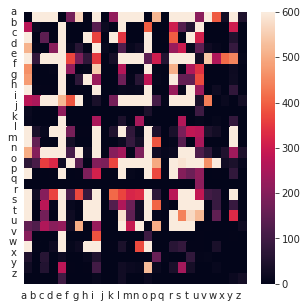

In [111]:
fig, ax = plt.subplots(1, figsize=(5,5))

sns.heatmap(probmat, vmax=600)
ax.set_xticks(range(len(alphabet)))
ax.set_yticks(range(len(alphabet)))
ax.set_xticklabels(alphabet)
ax.set_yticklabels(alphabet)
plt.show

In [113]:
cond_ent= np.zeros(len(alphabet))

for i in range(len(alphabet)):
  prob = probmat[i,:]
  prob = prob/sum(prob)
  cond_ent[i] = -sum(prob * np.log2(prob + np.finfo(float).eps))

In [115]:
cond_ent

array([ 3.63360202e+00,  2.94987682e+00,  3.23982864e+00,  3.01844058e+00,
        3.69429994e+00,  3.03873886e+00,  3.21226995e+00,  2.08696586e+00,
        3.37481621e+00,  1.52146062e+00,  2.35378802e+00,  3.28676203e+00,
        2.76973876e+00,  3.36292725e+00,  3.70198349e+00,  3.31245054e+00,
       -3.20342650e-16,  3.52321965e+00,  3.37232179e+00,  2.76206495e+00,
        3.45631743e+00,  1.16968228e+00,  2.74616075e+00,  2.67795321e+00,
        2.74492333e+00,  2.21839596e+00])

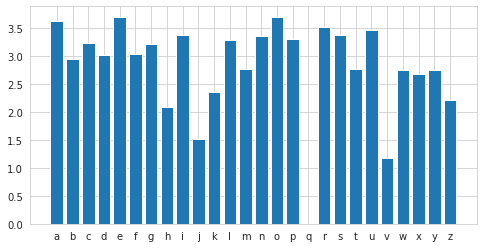

In [119]:
fig, ax = plt.subplots(1, figsize=(8,4))
ax.bar(range(len(alphabet)), cond_ent)
ax.set_xticks(range(len(alphabet)))
ax.set_xticklabels(alphabet)
plt.show()

# WordCloud

In [121]:
from wordcloud import WordCloud

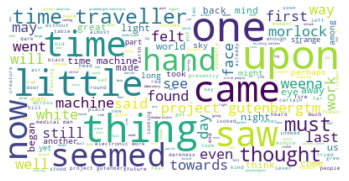

In [122]:
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(clean_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()